In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
ipl_df=pd.read_csv('matches.csv')
ipl_df.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## Let's do basic analysis about our dataframe

In [6]:
ipl_df.shape

(756, 18)

## Data preprocessing and Cleaning

In [8]:
ipl_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## We can see some Nan Values in the umpire column, in this analysis we dont requier umpire column so let's drop the umpire columns.

In [10]:
ipl_df.drop(columns=['umpire1','umpire2','umpire3'],inplace=True)
ipl_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [11]:
ipl_df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [16]:
ipl_df.Season.unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

In [17]:
ipl_df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [18]:
ipl_df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

## From the above observations some Data cleaning is required.
   1. Pune city was represented by various Team names as 'Rising Pune Supergiant','Pune Warriors','Rising Pune Supergiants' so as a covinience we will change the name of teams representing Pune as 'Rising Pune Supergiant' in all columns involving team1,team2,toss_winner & winner.
   2. Similarly we will change the team name of Delhi. The team name were'Delhi Daredevils' and  'Delhi Capitals'. So final team name is  'Delhi Capitals'
   3. Bangalore was renamed as Bengaluru in 2014, so we will change the name of city Banglore to Bengakuru across all data to avoid errors.

In [59]:
ipl_df.team1.replace({'Rising Pune Supergiants':'Rising Pune Supergiant','Delhi Daredevils':'Delhi Capitals','Pune Warriors':'Rising Pune Supergiant'}, inplace=True)
ipl_df.team2.replace({'Rising Pune Supergiants':'Rising Pune Supergiant','Delhi Daredevils':'Delhi Capitals','Pune Warriors':'Rising Pune Supergiant'}, inplace=True)
ipl_df.toss_winner.replace({'Rising Pune Supergiants':'Rising Pune Supergiant','Delhi Daredevils':'Delhi Capitals','Pune Warriors':'Rising Pune Supergiant'}, inplace=True)
ipl_df.winner.replace({'Rising Pune Supergiants':'Rising Pune Supergiant','Delhi Daredevils':'Delhi Capitals','Pune Warriors':'Rising Pune Supergiant'}, inplace=True)
ipl_df.city.replace({'Bangalore':'Bengaluru'},inplace=True)

In [54]:
ipl_df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [55]:
ipl_df.team2.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [60]:
ipl_df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali'], dtype=object)

## Lets check for missing values in the dataset

In [61]:
ipl_df.isnull().sum()

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [62]:
null_df=ipl_df[ipl_df.isna().any(axis=1)]
null_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,IPL-2011,Delhi,21-05-2011,Delhi Capitals,Rising Pune Supergiant,Delhi Capitals,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla
545,546,IPL-2015,Bengaluru,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
570,571,IPL-2015,Bengaluru,17-05-2015,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
744,11340,IPL-2019,Bengaluru,30-04-2019,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium


 From Above Observations We can See NaN values in various Columns like 'city', 'winner' ,'Player Of The Match'. But By Observation it is clear the NaN Values for columns like 'Winner' and 'Player Of The Match' are only for Case When Match had "No Result" so we Can assume the Match might have been a Draw or Cancelled Due to Some Weather Or Technical Conditions. While The Other Case 'City' Column has NaN values for Rows where Stadium Location is dubai. So we will Replace These NaN values and Insert "Dubai" as City in its Place

In [63]:
ipl_df.loc[460:480]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
460,461,IPL-2014,Abu Dhabi,18-04-2014,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,AM Rahane,Sheikh Zayed Stadium
461,462,IPL-2014,Dubai,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,IPL-2014,Dubai,19-04-2014,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,normal,0,Delhi Capitals,0,4,JP Duminy,Dubai International Cricket Stadium
463,464,IPL-2014,Sharjah,20-04-2014,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,GJ Maxwell,Sharjah Cricket Stadium
464,465,IPL-2014,Abu Dhabi,21-04-2014,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,normal,0,Chennai Super Kings,93,0,SK Raina,Sheikh Zayed Stadium
465,466,IPL-2014,Sharjah,22-04-2014,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kings XI Punjab,72,0,GJ Maxwell,Sharjah Cricket Stadium
466,467,IPL-2014,Dubai,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
467,468,IPL-2014,Sharjah,24-04-2014,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,2,0,CA Lynn,Sharjah Cricket Stadium
468,469,IPL-2014,Dubai,25-04-2014,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,IPL-2014,Dubai,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium


In [32]:
ipl_df.loc[[461,462,466,468,469,474,476],'city']='Dubai'

In [64]:
ipl_df.loc[460:480]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
460,461,IPL-2014,Abu Dhabi,18-04-2014,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,AM Rahane,Sheikh Zayed Stadium
461,462,IPL-2014,Dubai,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,IPL-2014,Dubai,19-04-2014,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,normal,0,Delhi Capitals,0,4,JP Duminy,Dubai International Cricket Stadium
463,464,IPL-2014,Sharjah,20-04-2014,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,GJ Maxwell,Sharjah Cricket Stadium
464,465,IPL-2014,Abu Dhabi,21-04-2014,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,normal,0,Chennai Super Kings,93,0,SK Raina,Sheikh Zayed Stadium
465,466,IPL-2014,Sharjah,22-04-2014,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kings XI Punjab,72,0,GJ Maxwell,Sharjah Cricket Stadium
466,467,IPL-2014,Dubai,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
467,468,IPL-2014,Sharjah,24-04-2014,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,2,0,CA Lynn,Sharjah Cricket Stadium
468,469,IPL-2014,Dubai,25-04-2014,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,IPL-2014,Dubai,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium


In [66]:
# now lets confirm if we have any Nan value in city column
ipl_df.isnull().sum()

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [38]:
# lets find the totl no of matches played from 2008-2019
ipl_df.id.count()

756

In [67]:
# lets find out total no of normal matches, is Not a Tie
regular_matches=ipl_df[ipl_df.result=='normal'].count()
regular_matches.result

743

we can see from 756 matches 13 matches resulted in a tie.

### Total matches Played in  each city

In [68]:
ipl_df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali'], dtype=object)

In [88]:
cities = ipl_df.groupby('city')[('id')].count()

In [93]:
cities_df=cities.reset_index()

In [94]:
cities_df

,city,id
0,Abu Dhabi,7
1,Ahmedabad,12
2,Bengaluru,80
3,Bloemfontein,2
4,Cape Town,7
5,Centurion,12
6,Chandigarh,46
7,Chennai,57
8,Cuttack,7
9,Delhi,74


 Lets Arrange the data in a mpre organised manner

In [100]:
cities_df.rename(columns={'id':'matches'},inplace=True)


In [108]:
cities_df=cities_df.sort_values('matches',ascending=True).reset_index()

In [109]:
cities_df

,index,city,matches
0,3,Bloemfontein,2
1,24,Nagpur,3
2,19,Kimberley,3
3,13,East London,3
4,18,Kanpur,4
5,20,Kochi,5
6,27,Raipur,6
7,30,Sharjah,6
8,0,Abu Dhabi,7
9,29,Ranchi,7


We can see that there are total of 32 location/cities that conducted IPL matches from 2008-2019

Lets plot them in a bargraph

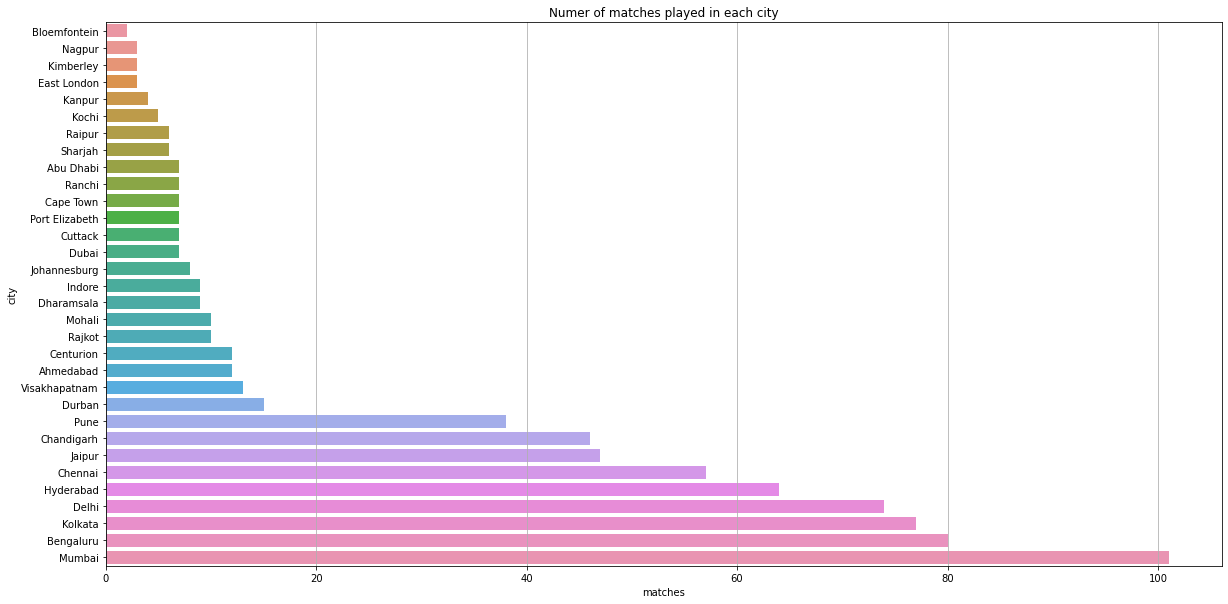

In [110]:
plt.figure(figsize=(20,10))
plt.grid()
plt.title('Numer of matches played in each city')
sns.barplot(x='matches',y='city',data=cities_df);

It seems Mumbai is the most favorable city followed by Bengaluru and Kolkata

In [111]:
ipl_df.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians', 'Delhi Capitals',
       'Gujarat Lions', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', nan], dtype=object)

In [115]:
winner_df=ipl_df.groupby('winner')[['id']].count()
winner_df=winner_df.sort_values('id',ascending=False).reset_index()
winner_df

,winner,id
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Delhi Capitals,77
6,Rajasthan Royals,75
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Rising Pune Supergiant,27


In [117]:
winner_df.rename(columns={'winner':'Teams','id':'wins'},inplace=True)
winner_df

,Teams,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Delhi Capitals,77
6,Rajasthan Royals,75
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Rising Pune Supergiant,27


Seems Mumbai Indians Have won the Most matches in IPL Till Date. Followed by Chennai Super Kings.

Now Lets Plot These Wins 

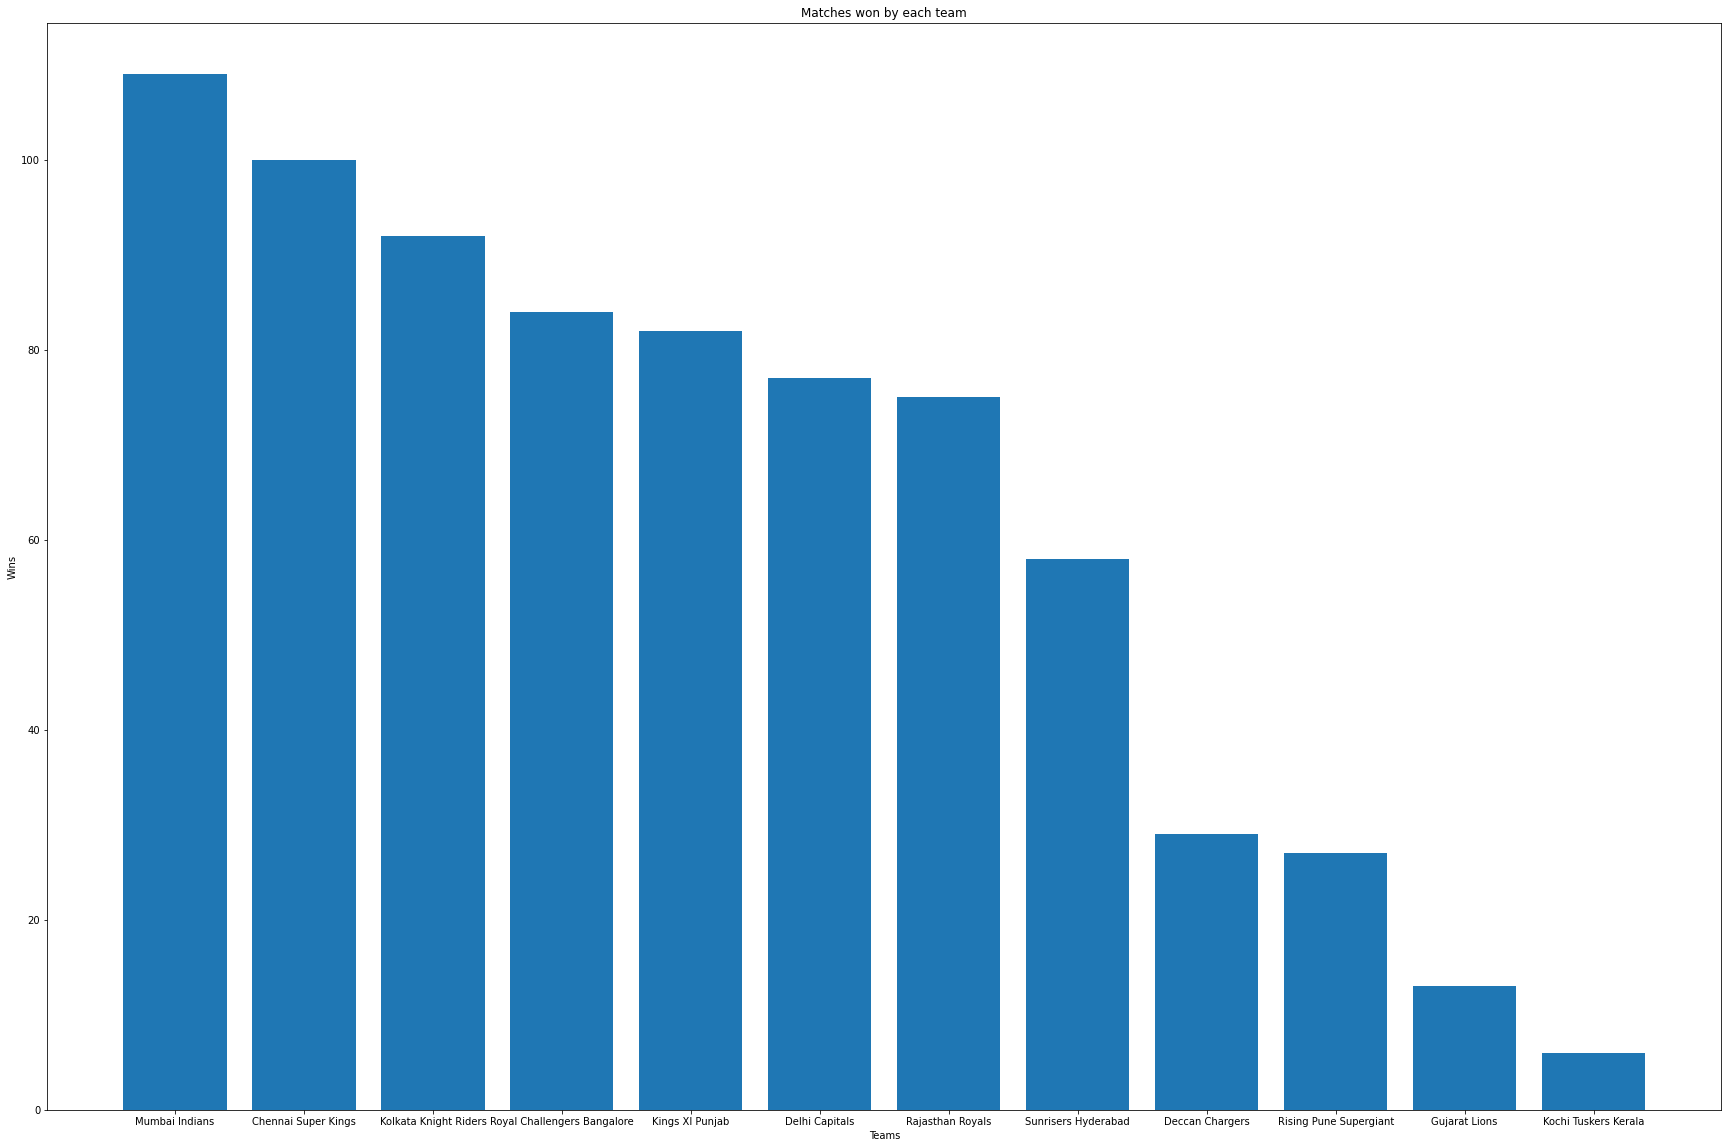

In [124]:
#Plotting Wins Vs Teams
plt.figure(figsize=(30,20))
plt.xlabel('Teams')
plt.ylabel('Wins')
plt.title('Matches won by each team');
plt.bar(winner_df.Teams,winner_df.wins);

Lets Add Colour To Each Team so That we Get A Clear Idea

We can do this by using color argument of the bar() Function

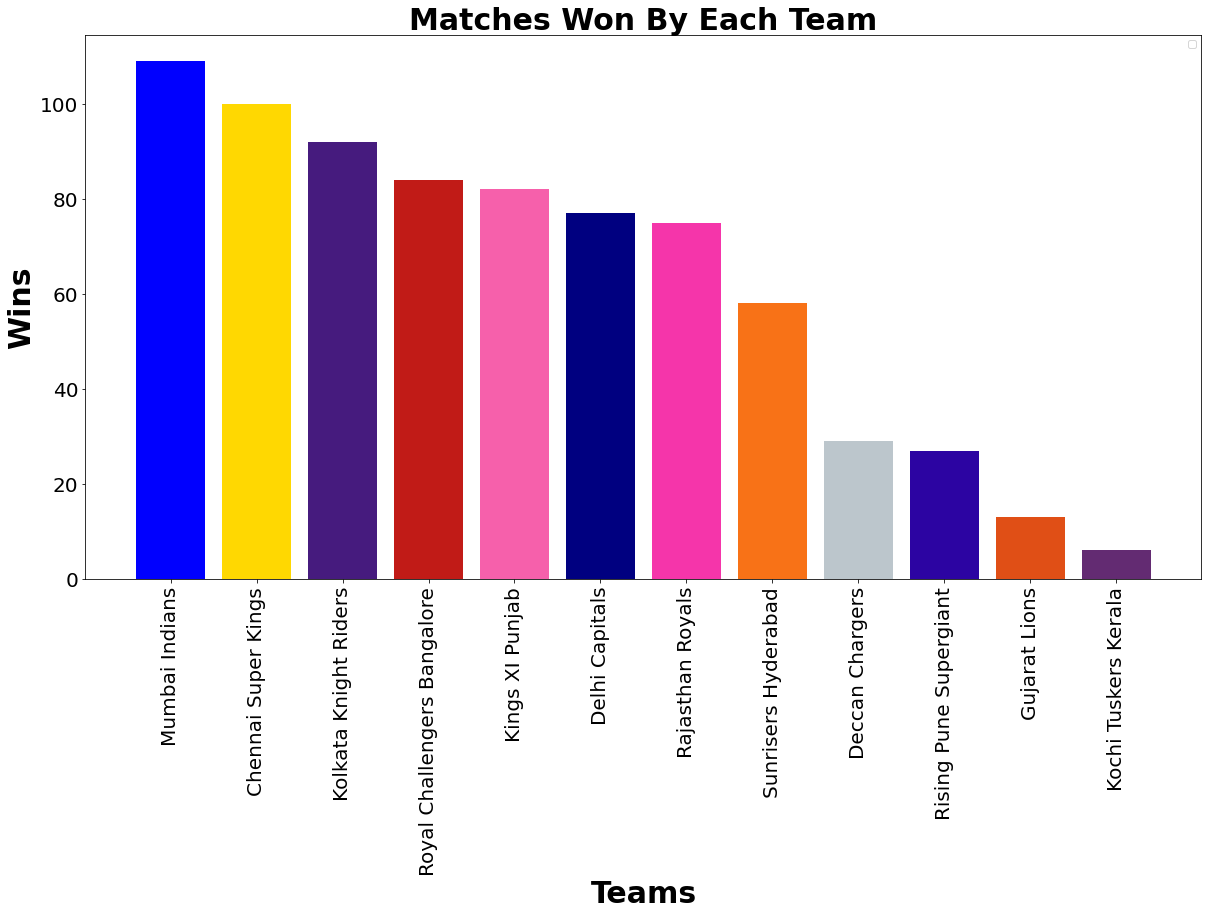

In [125]:
#We will be using colour code of teams jersey to make it easily understandable
plt.figure(figsize=(20,10))
plt.legend(winner_df.Teams,loc=1)
plt.xlabel('Teams',fontweight='bold',fontsize=30)
plt.ylabel('Wins',fontweight='bold',fontsize=30)
plt.tick_params(labelsize=20)
plt.xticks(rotation=90)
plt.title('Matches Won By Each Team',fontweight='bold',fontsize=30);
plt.bar(winner_df.Teams, winner_df.wins, color = ['blue','#FFD801','#461B7E','#C11B17','#F660AB','#000080','#F535AA','#F87217','#BCC6CC','#2C04A2','#E04F16','#632B72']);

Seasons with most number of matches

In [129]:
season_df=ipl_df.groupby('Season')[['id']].count()
season_df=season_df.sort_values('Season',ascending=False).reset_index()
season_df.rename(columns={'id':'matches','Season':'Year'},inplace=True)

In [130]:
season_df

,Year,matches
0,IPL-2019,60
1,IPL-2018,60
2,IPL-2017,59
3,IPL-2016,60
4,IPL-2015,59
5,IPL-2014,60
6,IPL-2013,76
7,IPL-2012,74
8,IPL-2011,73
9,IPL-2010,60


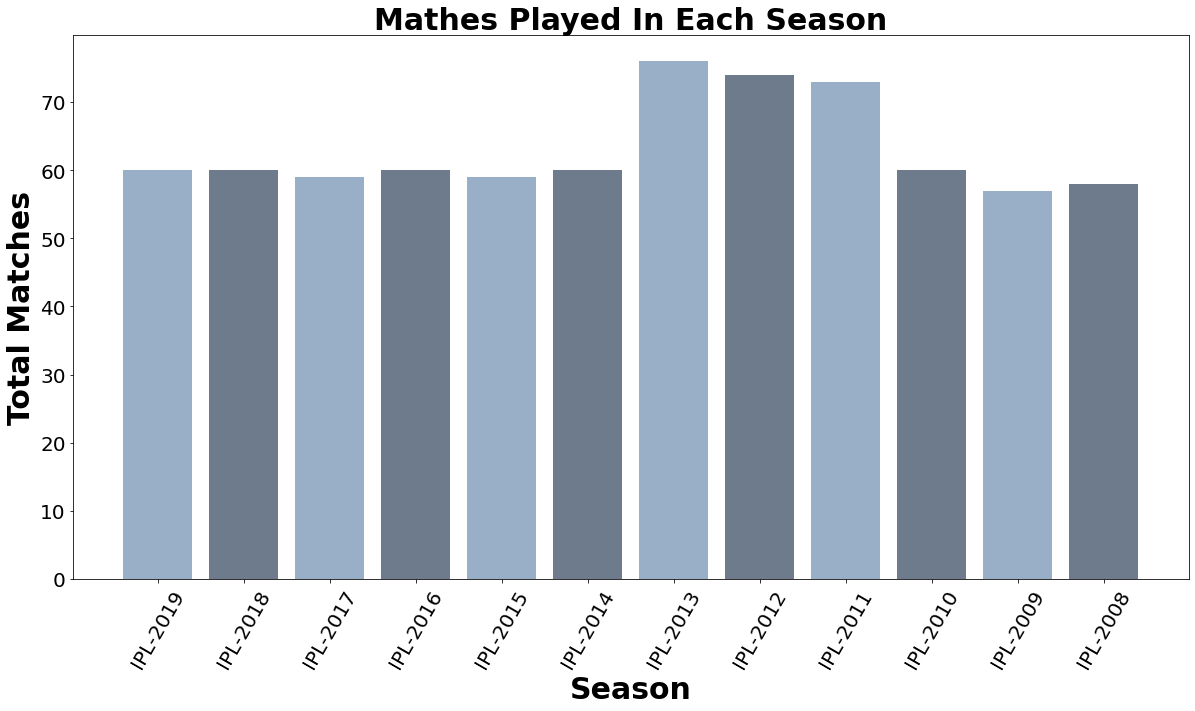

In [132]:
plt.figure(figsize=(20,10))
plt.title("Mathes Played In Each Season",fontweight='bold',fontsize=30)
plt.xlabel('Season',fontweight='bold',fontsize=30)
plt.ylabel('Total Matches',fontweight='bold',fontsize=30)
plt.xticks(rotation='60')
plt.tick_params(labelsize=20)
plt.bar(season_df.Year,season_df.matches,color=['#98AFC7','#6D7B8D']);

We can see from the above Bar chart that 2013 season had most no of matches

## Some Interesting Question to ask from this dataset



Q1. What was the most preferred Decision On winning Toss i.e. Bat / Field

In [134]:
ipl_df.toss_decision.unique()

array(['field', 'bat'], dtype=object)

In [138]:
decision_df=ipl_df.groupby('toss_decision')[['id']].count()
decision_df = decision_df.sort_values('id').reset_index()
decision_df.rename(columns={'id':'Total','toss_decision':'Decision'},inplace=True)

In [139]:
decision_df

,Decision,Total
0,bat,293
1,field,463


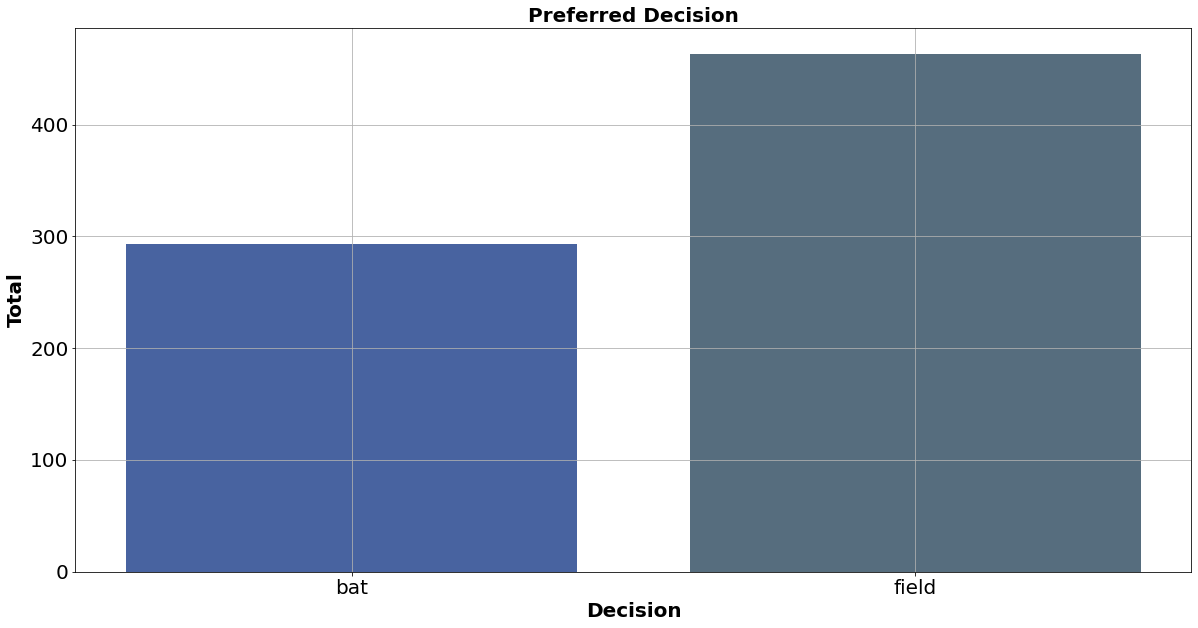

In [140]:
#Lets plot the Result
plt.figure(figsize=(20,10))
plt.title("Preferred Decision",fontweight='bold',fontsize=20)
plt.xlabel('Decision',fontweight='bold',fontsize=20)
plt.ylabel('Total',fontweight='bold',fontsize=20)
plt.tick_params(labelsize=20)
plt.grid()
plt.bar(decision_df.Decision, decision_df.Total, color=['#4863A0','#566D7E']);

##### The Most Preferred Decision After Winning Toss in the IPL Until 2019 has been "Choose to Field First"

Q2. Which Decision has proved most beneficial i.e Field / Bat


In [142]:
field_df=ipl_df.loc[(ipl_df['toss_winner'] == ipl_df['winner']) & (ipl_df['toss_decision'] == 'field'), ['id', 'winner','toss_decision']]

In [143]:
field_df.winner.count()

259

In [144]:
bat_df = ipl_df.loc[(ipl_df['toss_winner'] == ipl_df['winner']) & (ipl_df['toss_decision'] == 'bat'), ['id', 'winner','toss_decision']]

In [145]:
bat_df.winner.count()

134

In [146]:
frames = [bat_df, field_df]
result_df = pd.concat(frames)
result_df = result_df.groupby('toss_decision')[['id']].count()
result_df

,id
toss_decision,
bat,134
field,259


In [147]:
result_df = result_df.sort_values('id').reset_index()
result_df.rename(columns={'id':'Total','toss_decision':'Decision'},inplace=True)
result_df

,Decision,Total
0,bat,134
1,field,259


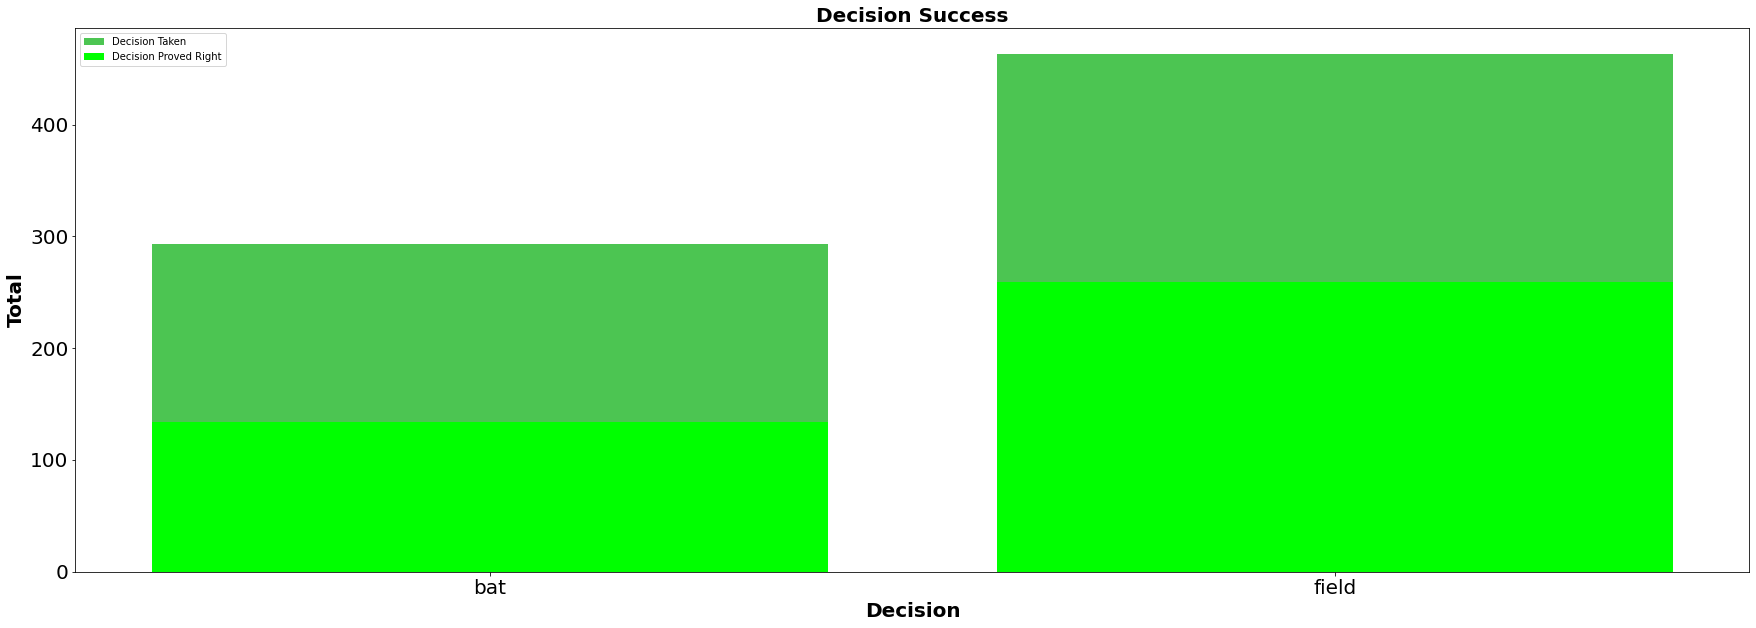

In [173]:
plt.figure(figsize=(30,10))
plt.title("Decision Success",fontweight='bold',fontsize=20)
plt.xlabel('Decision',fontweight='bold',fontsize=20)
plt.ylabel('Total',fontweight='bold',fontsize=20)
plt.tick_params(labelsize=20)
plt.bar(decision_df.Decision, decision_df.Total, color=['#4CC552','#4CC552']);
plt.bar(result_df.Decision, result_df.Total, color=['#00FF00','#00FF00']);
plt.legend(['Decision Taken','Decision Proved Right']);

Q4. Who has been awarded with Player Of the Match maximum Number Of Times

In [151]:
len(ipl_df.player_of_match.unique())

227

This is Huge Number, we can see 227 Players have been awarded with player of the match title

Now Among these players lets see who have Got the maximum Player of The Match Awards

In [161]:
player_df=ipl_df.groupby('player_of_match')[['id']].count()
player_df=player_df.sort_values('id',ascending=False).reset_index()
player_df

,player_of_match,id
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,DA Warner,17
4,RG Sharma,17
...,...,...
221,KMDN Kulasekara,1
222,KK Cooper,1
223,K Rabada,1
224,K Paul,1


In [163]:
player_df.head(10)
player_df.rename(columns={'id':'Total_Awards','player_of_match':'Man_Of_The_Match'},inplace=True)

In [168]:
players_df=player_df.head(10)

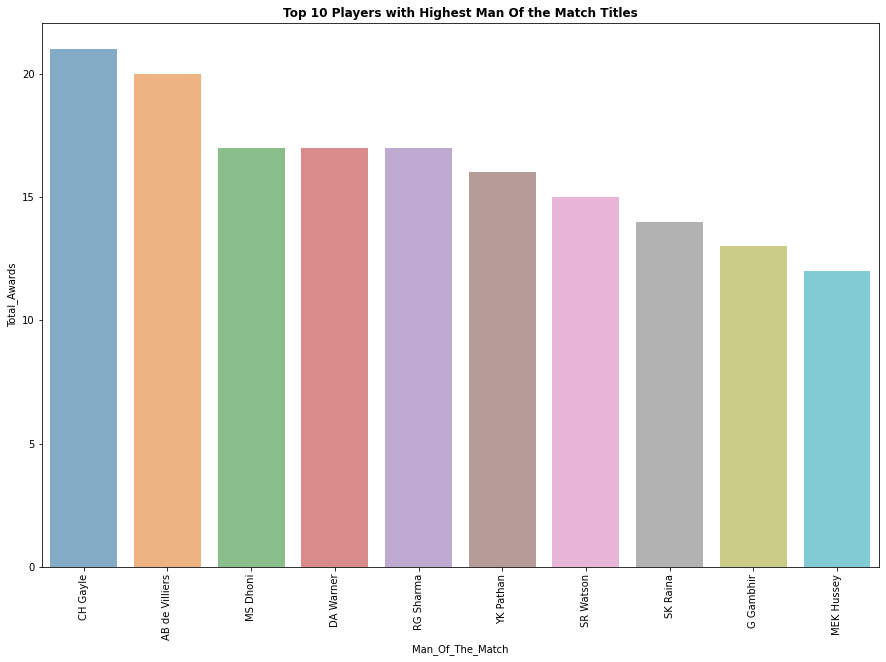

In [169]:
plt.figure(figsize=(15,10))
plt.title("Top 10 Players with Highest Man Of the Match Titles",fontweight='bold' )
plt.xticks(rotation=90)
plt.yticks(ticks=np.arange(0,25,5))
plt.ylabel('No. of Awards')
plt.xlabel('Players')
sns.barplot(x=players_df.Man_Of_The_Match,y=players_df.Total_Awards, alpha=0.6);

In [ ]:
We can see from the above bar graph that Chris Gayle has been awarded Man of the Match most no of time..